<a href="https://colab.research.google.com/github/Vladimir2303850/MyAnalyticsProjects/blob/main/correlation_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Задача: Очистить исходный датасет от строковых типов данных в числовых столбцах, выдвинуть гипотезу о корреляции показателей, доказать гипотезу



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_excel('datanew.xlsx')

In [ ]:
df

,Себестоимость продукции,Стоимость сырья,Затраты на электроэнергию,Заработная плата,Административные расходы
0,У,Х1,Х2,Х3,Х4
1,346,100,22,55,18.2
2,348,шрл,24,60,16.6
3,350,109,26,65,13.1
4,352,116,28,70,10
5,354,123,0,0,18.2
6,NaN,рл,32,9,16.6
7,NaN,137,34,-199999,1
8,NaN,144,0,90,6
9,362,151,38,95,9


In [ ]:
cols_to_check = ['Себестоимость продукции', 'Стоимость сырья',
                'Затраты на электроэнергию', 'Заработная плата',
                'Административные расходы']

def to_numeric_or_zero(x):
    if pd.isna(x) or x == "":
        return 0.0
    try:
        num = float(x)
        return num
    except (ValueError, TypeError):
        return 0.0
clean_df = df.copy()
for col in cols_to_check:
    clean_df[col] = clean_df[col].apply(to_numeric_or_zero)

clean_df

,Себестоимость продукции,Стоимость сырья,Затраты на электроэнергию,Заработная плата,Административные расходы
0,0.0,0.0,0.0,0.0,0.0
1,346.0,100.0,22.0,55.0,18.2
2,348.0,0.0,24.0,60.0,16.6
3,350.0,109.0,26.0,65.0,13.1
4,352.0,116.0,28.0,70.0,10.0
5,354.0,123.0,0.0,0.0,18.2
6,0.0,0.0,32.0,9.0,16.6
7,0.0,137.0,34.0,-199999.0,1.0
8,0.0,144.0,0.0,90.0,6.0
9,362.0,151.0,38.0,95.0,9.0


In [ ]:
cols_to_check = ['Себестоимость продукции', 'Стоимость сырья',
                'Затраты на электроэнергию', 'Заработная плата',
                'Административные расходы']

def replace_outliers_with_mean(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = series[(series >= lower_bound) & (series <= upper_bound) & (series != 0)].median()
    series[(series < lower_bound) | (series > upper_bound) | (series == 0)] = median_value
    return series

for col in cols_to_check:
    clean_df[col] = replace_outliers_with_mean(clean_df[col])

clean_df

,Себестоимость продукции,Стоимость сырья,Затраты на электроэнергию,Заработная плата,Административные расходы
0,367.0,144.0,30.0,95.0,13.1
1,346.0,100.0,22.0,55.0,18.2
2,348.0,144.0,24.0,60.0,16.6
3,350.0,109.0,26.0,65.0,13.1
4,352.0,116.0,28.0,70.0,10.0
5,354.0,123.0,30.0,95.0,18.2
6,367.0,144.0,32.0,9.0,16.6
7,367.0,137.0,34.0,95.0,1.0
8,367.0,144.0,30.0,90.0,6.0
9,362.0,151.0,38.0,95.0,9.0


In [ ]:
clean_df

,Себестоимость продукции,Стоимость сырья,Затраты на электроэнергию,Заработная плата,Административные расходы
0,365.125,148.272727,29.466667,78.273333,12.51875
1,346.000,100.000000,22.000000,55.000000,18.20000
2,348.000,148.272727,24.000000,60.000000,16.60000
3,350.000,109.000000,26.000000,65.000000,13.10000
4,352.000,116.000000,28.000000,70.000000,10.00000
5,354.000,123.000000,29.466667,78.273333,18.20000
6,365.125,148.272727,32.000000,9.000000,16.60000
7,365.125,137.000000,34.000000,78.273333,1.00000
8,365.125,144.000000,29.466667,90.000000,6.00000
9,362.000,151.000000,38.000000,95.000000,9.00000


Между себестоимостью продукции и хотя бы одним из факторов (стоимость сырья, затраты на электроэнергию, заработная плата, административные расходы) существует статистически значимая линейная корреляция.

                           Себестоимость продукции  Стоимость сырья  \
Себестоимость продукции                   1.000000         0.711431   
Стоимость сырья                           0.711431         1.000000   
Затраты на электроэнергию                 0.509549         0.415247   
Заработная плата                          0.321088         0.384307   
Административные расходы                 -0.228562        -0.023370   

                           Затраты на электроэнергию  Заработная плата  \
Себестоимость продукции                     0.509549          0.321088   
Стоимость сырья                             0.415247          0.384307   
Затраты на электроэнергию                   1.000000          0.404303   
Заработная плата                            0.404303          1.000000   
Административные расходы                   -0.345202          0.092884   

                           Административные расходы  
Себестоимость продукции                   -0.228562  
Стоимость сырья     

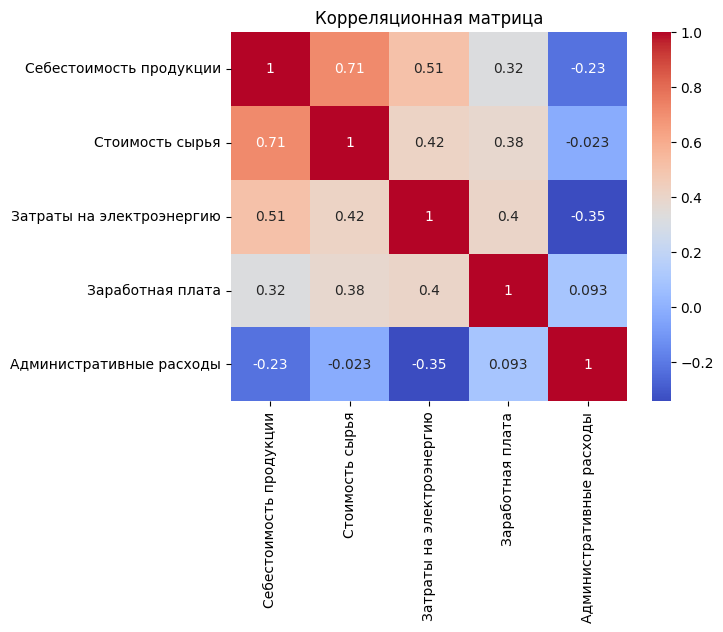

In [ ]:
df = clean_df.copy()
corr_matrix = df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()


Гипотеза подтверждается для стоимости сырья и себестоимости продукции

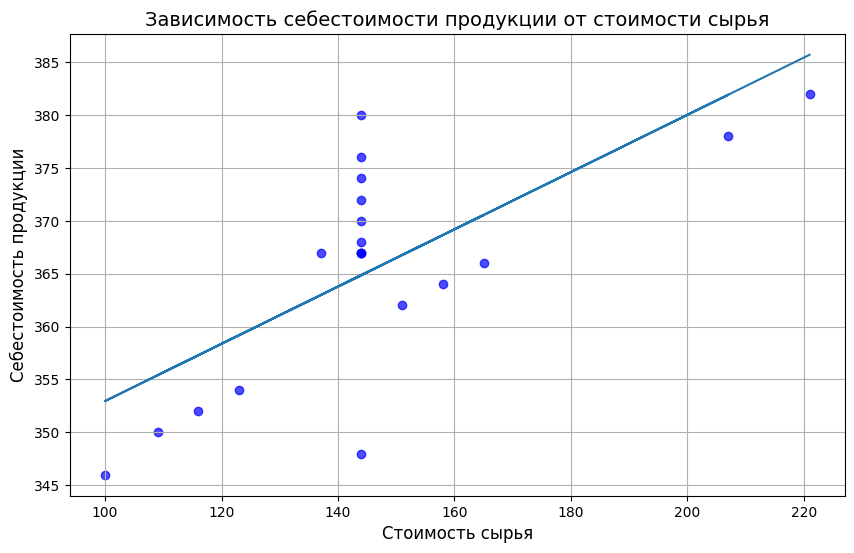

In [ ]:
import numpy as np
plt.figure(figsize=(10, 6))
plt.scatter(df['Стоимость сырья'], df['Себестоимость продукции'], color='blue', alpha=0.7)
plt.title('Зависимость себестоимости продукции от стоимости сырья', fontsize=14)
plt.xlabel('Стоимость сырья', fontsize=12)
plt.ylabel('Себестоимость продукции', fontsize=12)
plt.grid(True)
z = np.polyfit(df['Стоимость сырья'], df['Себестоимость продукции'], 1)
p = np.poly1d(z)
plt.plot(df['Стоимость сырья'], p(df['Стоимость сырья']))
plt.show()

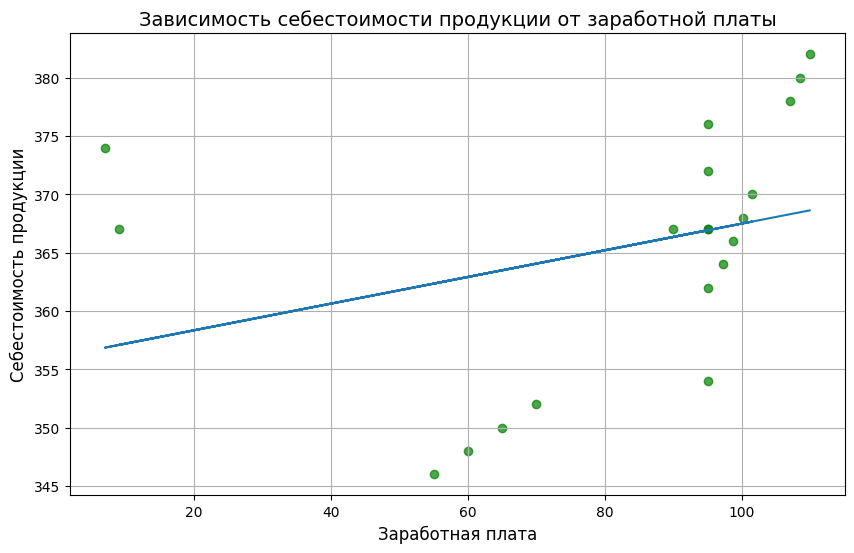

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Заработная плата'], df['Себестоимость продукции'], color='green', alpha=0.7)
plt.title('Зависимость себестоимости продукции от заработной платы', fontsize=14)
plt.xlabel('Заработная плата', fontsize=12)
plt.ylabel('Себестоимость продукции', fontsize=12)
plt.grid(True)
z = np.polyfit(df['Заработная плата'], df['Себестоимость продукции'], 1)
p = np.poly1d(z)
plt.plot(df['Заработная плата'], p(df['Заработная плата']))
plt.show()

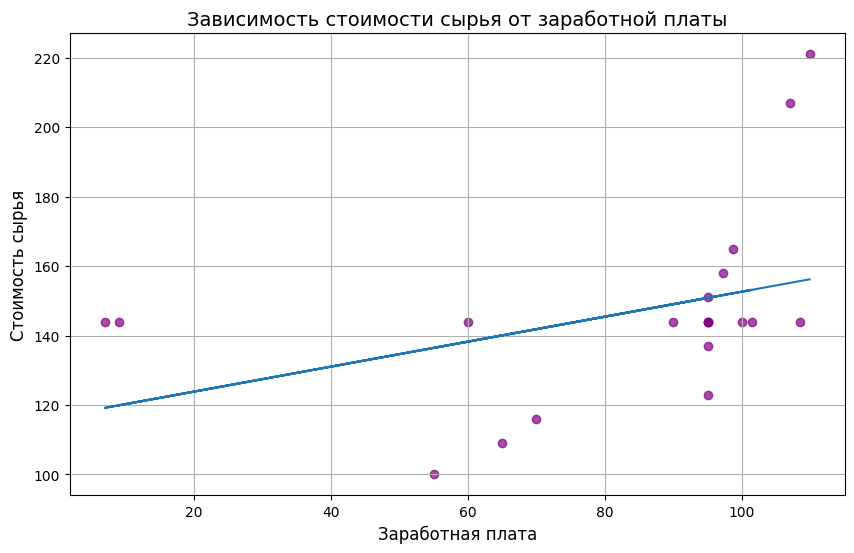

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Заработная плата'], df['Стоимость сырья'], color='purple', alpha=0.7)
plt.title('Зависимость стоимости сырья от заработной платы', fontsize=14)
plt.xlabel('Заработная плата', fontsize=12)
plt.ylabel('Стоимость сырья', fontsize=12)
plt.grid(True)
z = np.polyfit(df['Заработная плата'], df['Стоимость сырья'], 1)
p = np.poly1d(z)
plt.plot(df['Заработная плата'], p(df['Заработная плата']))
plt.show()